# MOVIE RECOMMENDATION SYSTEM

In [1]:
! pip install nltk scikit-learn numpy pandas -q

In [33]:
# importing dependencies
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize




In [3]:
# loading the datasets
movie = pd.read_csv('/content/movies.csv')

In [4]:
movie.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
movie.shape

(4803, 24)

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [8]:
# filtering the column which we are required
new_columns =["genres","keywords","overview", "title"]

In [9]:
movie = movie[new_columns]

In [10]:
movie.shape

(4803, 4)

In [11]:
movie.head()

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter


In [12]:
#checking the missing values

movie.isnull().sum()

,0
genres,28
keywords,412
overview,3
title,0


In [13]:
movie = movie.dropna().reset_index(drop=True)

In [14]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4387 non-null   object
 1   keywords  4387 non-null   object
 2   overview  4387 non-null   object
 3   title     4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


In [15]:
# adding the combined column
movie["combined"] = movie["genres"] + " " + movie["keywords"] + " " + movie["overview"]

In [16]:
movie.head()

,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Action Adventure Science Fiction based on nove...


In [17]:
movie.tail()

,genres,keywords,overview,title,combined
4382,Drama,gang audition police fake homeless actress,A young woman in L.A. is having a bad day: she...,Bang,Drama gang audition police fake homeless actre...
4383,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,Friends/fledgling entrepreneurs invent a devic...,Primer,Science Fiction Drama Thriller distrust garage...
4384,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,El Mariachi just wants to play his guitar and ...,El Mariachi,Action Crime Thriller united states\u2013mexic...
4385,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered",Comedy Drama Romance TV Movie date love at fir...
4386,Documentary,obsession camcorder crush dream girl,Ever since the second grade when he first saw ...,My Date with Drew,Documentary obsession camcorder crush dream gi...


In [20]:
moviedata = movie[['title','combined']]

In [21]:
moviedata.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...


In [23]:
moviedata.shape

(4387, 2)

In [24]:
#WOrdCloud for movie content
combined_words = ' '.join(moviedata.combined)
wordcloud = WordCloud(width = 1000, height = 500).generate(combined_words)

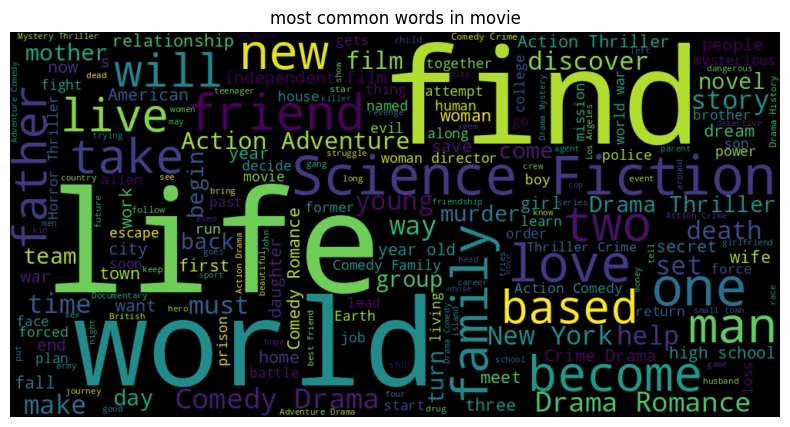

In [25]:
# wordcloud to visualize the most common words in the movie datatset
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most common words in movie')
plt.show()

In [27]:
#dowmlaod nlp tasks

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
stopwords = set(stopwords.words('english'))

In [29]:
# working in lower the english aplbhadet and some tolenization

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords]
    return " ".join(tokens)

In [30]:
# appling [reprocessing to the middle content

moviedata['cleaned_text'] = movie['combined'].apply(preprocess_text)

/tmp/ipython-input-1718446918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata['cleaned_text'] = movie['combined'].apply(preprocess_text)


In [31]:
moviedata.head()

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,action crime drama thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...,action adventure science fiction based on nove...


In [36]:
# now using tf-idf from converting text into vectors

tfidf  = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(moviedata['cleaned_text'])

In [37]:
# compute the cosine similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [38]:
print(cosine_sim[2])

[0.0371168  0.05443748 1.         ... 0.04318979 0.0484529  0.02299144]


In [40]:
# making the recommendation system


def recommend_movies(movie_name, cosine_sim=cosine_sim, movie = moviedata, top_n=7):

  # finding the index of the movie
  idx = movie[movie['title'].str.lower()==movie_name.lower()].index
  if len(idx) == 0:
    return "Movie not found in the Dataset"
  idx =idx[0]


  #getting similarity score

  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores =sorted(sim_scores, key=lambda x:x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]


  #get tmovie indices

  movie_indices = [i[0]for i in sim_scores]


  # return top n similar movies

  return movie[['title']].iloc[movie_indices]

In [41]:
moviedata["title"]

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4382,Bang
4383,Primer
4384,El Mariachi
4385,"Signed, Sealed, Delivered"


In [43]:

# row_index = movie[movie['title'] == "Avengers: Age of Ultron"].index
row_index = movie[movie['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([9], dtype='int64')


In [46]:
movie_name =movie["title"][45]
print(movie_name)

World War Z


In [47]:
# eaxmple recommendation
print(f"Recommendation for the movie {movie_name}")
recommonded_movies = recommend_movies(movie_name)
print(recommonded_movies)


Recommendation for the movie World War Z
                          title
2238           Land of the Dead
3152             The Omega Code
806                    Superman
1536                Warm Bodies
1994  Megiddo: The Omega Code 2
1368              Resident Evil
3061                All Is Lost
